## Bike rental Data Preparation rev1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

### Kaggle Bike Sharing Demand Dataset

#### Download Train and Test data from Kaggle

Reference: https://www.kaggle.com/c/bike-sharing-demand/data

In [16]:
columns = ['count','season','holiday', 'workingday','weather','temp',
          'atemp','humidity', 'windspeed', 'year','month','day','dayofweek','hour']

In [17]:
df = pd.read_csv('train.csv',parse_dates=['datetime'],index_col=0)
df_test = pd.read_csv('test.csv', parse_dates=['datetime'],index_col=0)

In [18]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [21]:
df.loc['2011-02-04'].head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-02-04 00:00:00,1,0,1,2,8.20,12.880,44,0.0000,3,10,13
2011-02-04 01:00:00,1,0,1,2,6.56,11.365,59,0.0000,0,7,7
2011-02-04 02:00:00,1,0,1,2,5.74,8.335,63,7.0015,0,1,1
2011-02-04 03:00:00,1,0,1,2,5.74,8.335,63,7.0015,0,1,1
2011-02-04 05:00:00,1,0,1,2,5.74,7.575,63,8.9981,0,7,7


In [22]:
df.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [23]:
df.index.year

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', name='datetime', length=10886)

In [24]:
def add_features(df):
    df['year']=df.index.year
    df['month']=df.index.month
    df['day']=df.index.day
    df['dayofweek']=df.index.dayofweek
    df['hour']=df.index.hour

In [25]:
add_features(df)
add_features(df_test)

In [26]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [27]:
df.loc['2011'].head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


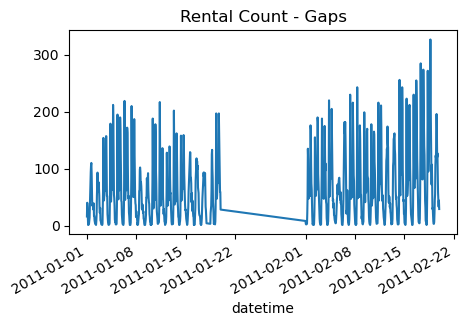

In [35]:
plt.figure(figsize=(5,3))
plt.title('Rental Count - Gaps')
df.loc['2011-01':'2011-02']['count'].plot()
plt.show()

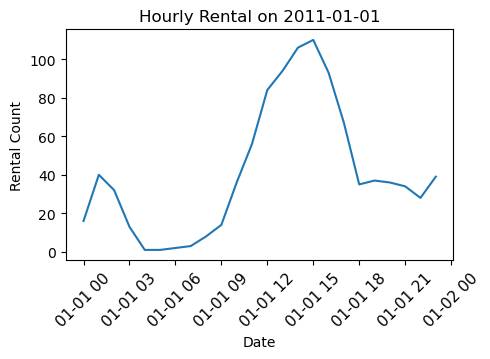

In [36]:
# Rentals change hourly

plt.figure(figsize=(5,3))
plt.plot(df.loc['2011-01-01']['count'])
plt.xticks(fontsize=11, rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Hourly Rental on 2011-01-01')
plt.show()

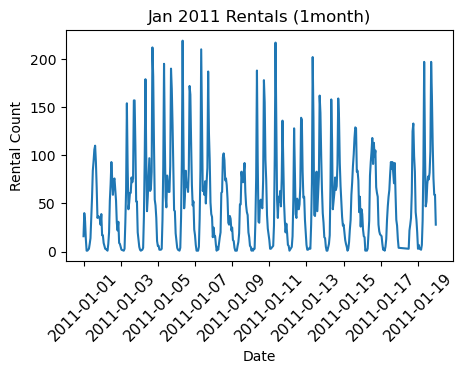

In [37]:
# Seasonal

plt.figure(figsize=(5,3))
plt.plot(df.loc['2011-01']['count'])
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.xticks(fontsize=11, rotation=45)
plt.title('Jan 2011 Rentals (1month)')
plt.show()

In [38]:
group_hour = df.groupby(['hour'])
average_by_hour = group_hour['count'].mean()

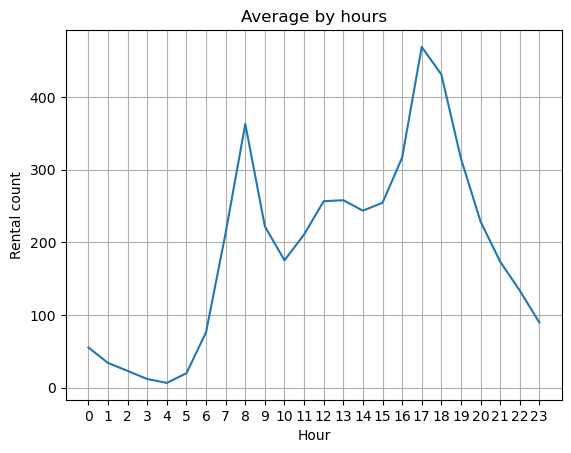

In [43]:
plt.plot(average_by_hour.index,average_by_hour)
plt.xlabel('Hour')
plt.ylabel('Rental count')
plt.title('Average by hours')
plt.xticks(average_by_hour.index)
plt.grid()
plt.show()

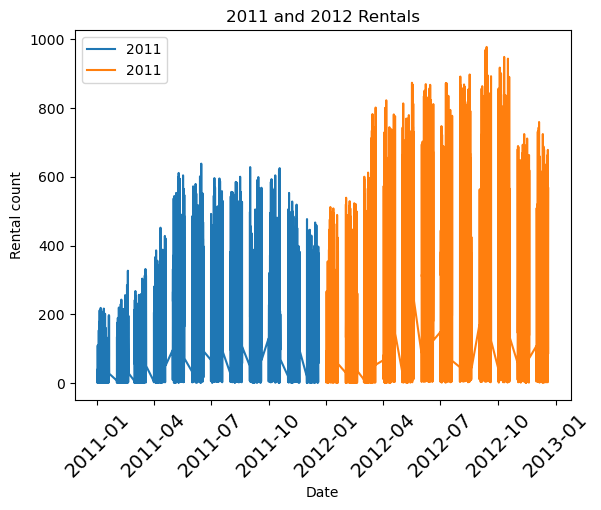

In [44]:
plt.plot(df.loc['2011']['count'], label='2011')
plt.plot(df.loc['2012']['count'], label='2011')
plt.xlabel('Date')
plt.ylabel('Rental count')
plt.xticks(fontsize=14, rotation=45)
plt.title('2011 and 2012 Rentals')
plt.legend()
plt.show()

In [45]:
group_year_month = df.groupby(['year','month'])
average_year_month = group_year_month['count'].mean()

In [46]:
average_year_month

year  month
2011  1         54.645012
      2         73.641256
      3         86.849776
      4        111.026374
      5        174.809211
      6        196.877193
      7        203.614035
      8        182.666667
      9        174.622517
      10       174.773626
      11       155.458333
      12       134.173246
2012  1        124.353201
      2        145.646154
      3        208.276923
      4        257.455947
      5        264.109649
      6        287.186404
      7        267.037281
      8        285.570175
      9        292.598684
      10       280.508772
      11       231.980220
      12       217.054825
Name: count, dtype: float64

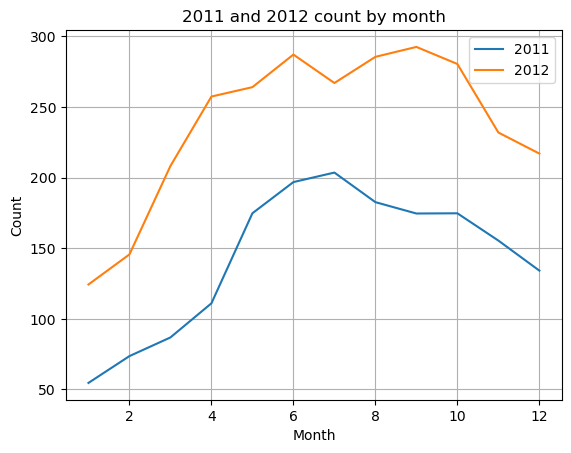

In [48]:
for year in average_year_month.index.levels[0]:
    plt.plot(average_year_month[year].index,average_year_month[year],label=year)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('2011 and 2012 count by month')
plt.grid()
plt.show()

In [49]:
group_year_hour = df.groupby(['year','hour'])
average_year_hour = group_year_hour['count'].mean()

In [ ]:
average_year_hour

In [52]:
average_year_hour.index.levels[0]

Int64Index([2011, 2012], dtype='int64', name='year')

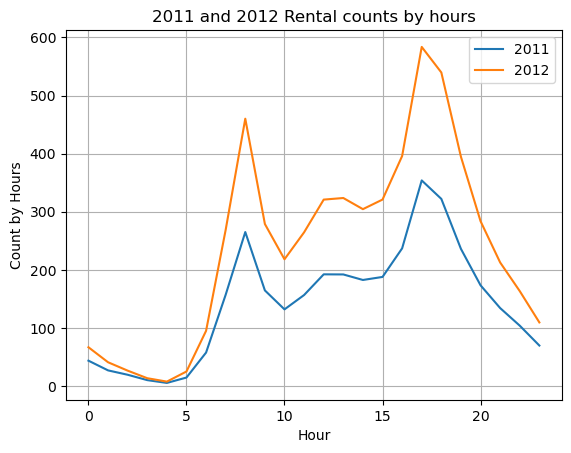

In [55]:
for year in average_year_hour.index.levels[0]:
    plt.plot(average_year_hour[year].index, average_year_hour[year],label=year)

plt.xlabel('Hour')
plt.ylabel('Count by Hours')
plt.title('2011 and 2012 Rental counts by hours')
plt.legend()
plt.grid()
plt.show()

In [56]:
group_workingday_hour = df.groupby(['workingday','hour'])
average_workingday_hour = group_workingday_hour['count'].mean()

In [ ]:
average_workingday_hour

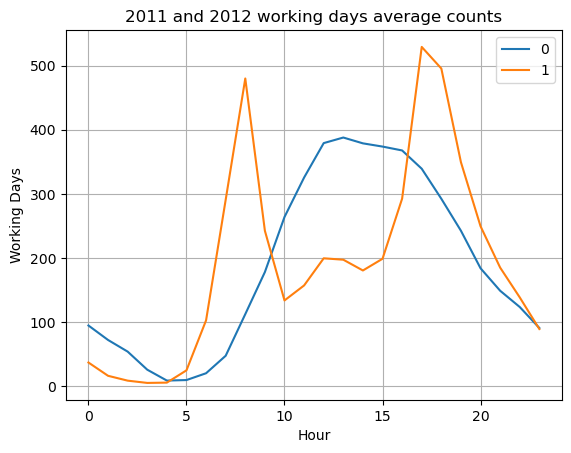

In [60]:
for workingday in average_workingday_hour.index.levels[0]:
    plt.plot(average_workingday_hour[workingday].index, average_workingday_hour[workingday],label=workingday)

plt.xlabel('Hour')
plt.ylabel('Working Days')
plt.title('2011 and 2012 working days average counts')
plt.legend()
plt.grid()
plt.show()

In [62]:
df.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
day           0.019826
dayofweek    -0.002283
hour          0.400601
Name: count, dtype: float64

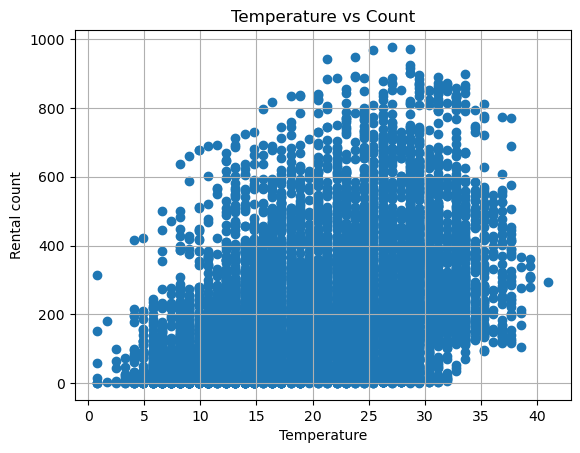

In [64]:
# any relation between temperature and rental count

plt.scatter(x=df['temp'], y=df['count'])
plt.xlabel('Temperature')
plt.ylabel('Rental count')
plt.title('Temperature vs Count')
plt.grid()
plt.show()

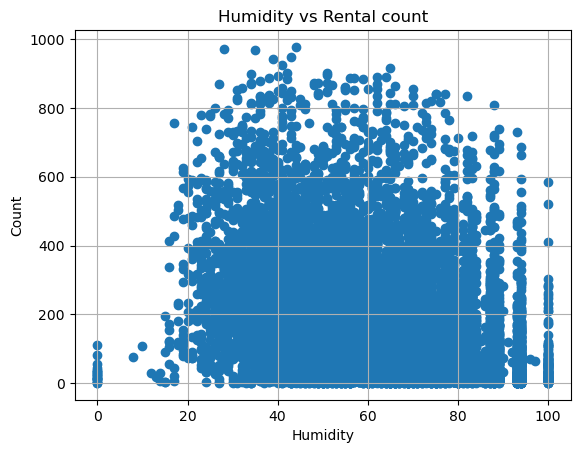

In [65]:
# any relation between Humidity and Rental count

plt.scatter(x=df['humidity'],y=df['count'])
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Humidity vs Rental count')
plt.grid()
plt.show()

In [68]:
df.to_csv('bike_all.csv',index=True, index_label='datetime',columns=columns)

### Training and Validation set

Target Variable 'Count' as first column followed by input features

Training and Validation dataset files do not have column header

In [71]:
df['count'].count()

10886

In [73]:
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.loc[l]

In [74]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-09-03 00:00:00,3,0,0,2,26.24,30.305,73,7.0015,22,65,87,2011,9,3,5,0
2012-08-13 14:00:00,3,0,1,1,32.80,34.850,33,7.0015,85,163,248,2012,8,13,0,14
2011-11-05 17:00:00,4,0,0,1,15.58,19.695,40,11.0014,100,234,334,2011,11,5,5,17
2012-08-09 19:00:00,3,0,1,1,32.80,37.880,55,12.9980,90,533,623,2012,8,9,3,19
2011-04-14 06:00:00,2,0,1,1,13.94,17.425,76,7.0015,4,66,70,2011,4,14,3,6


In [75]:
rows = df.shape[0]
train = int(rows * 0.7)
test = rows - train
rows,train,test

(10886, 7620, 3266)

In [76]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [81]:
# Writing Training dataset

df.iloc[:train].to_csv('bike_train.csv', index=False, header=False, columns=columns)

In [82]:
# writing validation dataset

df.iloc[train:].to_csv('bike_validation.csv', index=False, header=False, columns=columns)

In [83]:
# Test Data has only input features
df_test.to_csv('bike_test', index=True, index_label='datetime')

In [84]:
print(','.join(columns))

count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour


In [85]:
# Write columns list
with open('bike_train_column_list.txt','w') as f:
    f.write(','.join(columns))